# Text Classification

In [8]:
# Python implementation for the in-class PPT example (Bag-of-Words)

# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer

# Input sentences for analysis
sentences = ["It was the best of times",
             "It was the worst of times",
             "It was the age of wisdom",
             "It was the age of foolishness"]

# Create an object
cv = CountVectorizer()

# Generate output for Bag-of-Words
BOW = cv.fit_transform(sentences).toarray()

# Total words with their index in model
print(cv.vocabulary_)
print("\n")

# Features
print(cv.get_feature_names())
print("\n")

# Print the output
print(BOW)

{'it': 3, 'was': 7, 'the': 5, 'best': 1, 'of': 4, 'times': 6, 'worst': 9, 'age': 0, 'wisdom': 8, 'foolishness': 2}


['age', 'best', 'foolishness', 'it', 'of', 'the', 'times', 'was', 'wisdom', 'worst']


[[0 1 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 1 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Python implementation for the in-class PPT example (TF-IDF)

# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Input sentences for analysis
sentences = ['It is going to snow today','Today I am not going outside','I am going to watch Liar Liar']

# Intialize TFIDFVectorizer
vectorizer = TfidfVectorizer(norm = None)

# Vectorize or generate output of all three sentencess and find feature names
X = vectorizer.fit_transform(sentences).toarray()

# Total words with their index in model
print(vectorizer.vocabulary_)
print("\n")

# Features
print(vectorizer.get_feature_names())
print("\n")

# Print the output
print(X)

{'it': 3, 'is': 2, 'going': 1, 'to': 8, 'snow': 7, 'today': 9, 'am': 0, 'not': 5, 'outside': 6, 'watch': 10, 'liar': 4}


['am', 'going', 'is', 'it', 'liar', 'not', 'outside', 'snow', 'to', 'today', 'watch']


[[0.         1.         1.69314718 1.69314718 0.         0.
  0.         1.69314718 1.28768207 1.28768207 0.        ]
 [1.28768207 1.         0.         0.         0.         1.69314718
  1.69314718 0.         0.         1.28768207 0.        ]
 [1.28768207 1.         0.         0.         3.38629436 0.
  0.         0.         1.28768207 0.         1.69314718]]


# 1. Classify a text as positive/negative sentiment
* Detect if a text is positive or negative sentiment

In [10]:
# Sentiment analysis with TextBlob
from textblob import TextBlob
text="It was a very pleasant day"
blob=TextBlob(text)

# Using the sentiment attribute 
print(blob.sentiment)
if(blob.sentiment.polarity > 0):
  print("Positive")

Sentiment(polarity=0.9533333333333333, subjectivity=1.0)
Positive


# 2. Build a text classifier with TextBlob
* Build a text classifier with available train data using textblob library

In [11]:
# Importing the classifier
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Data to train the classifier
train = [
    ('I love eating sushi','food-review'),
    ('This is an amazing place!', 'Tourist-review'),
    ('Pizza is my all time favorite food','food-review'),
    ('I baked a cake yesterday, it was tasty', 'food-review'),
    ("What an awesome taste this sushi has", 'food-review'),
    ('It is a perfect place for outing', 'Tourist-review'),
    ('This is a nice picnic spot', 'Tourist-review'),
    ("Families come out on tours here", 'Tourist-review'),
    ('It is a beautiful place !', 'Tourist-review'),
    ('The place was warm and nice', 'Tourist-review')
]
test = [
    ('The sushi was good', 'food-review'),
    ('The place was perfect for picnics ', 'Tourist-review'),
    ("Burgers are my favorite food", 'food-review'),
    ("I feel amazing!", 'food-review'),
    ('It is an amazing place', 'Tourist-review'),
    ("This isn't a very good place", 'Tourist-review')
]

# Training
cl = NaiveBayesClassifier(train)

# Classify some text
print(cl.classify("My favorite food is spring rolls"))  
print(cl.classify("It was a cold place for picnic"))  

# Printing accuracy of classifier
print("Accuracy: {0}".format(cl.accuracy(test)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


food-review
Tourist-review
Accuracy: 0.8333333333333334


# 3. Train a text classifier using Simple transformers
* Build and train a text classifier for the given data using *simpletransformers* library

In [12]:
# Import requirements

!pip install simpletransformers
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_data = [
    ["The movie was amazing", 1],
    ["It was a boring movie", 0],
    ["I had a great experience",1],
    ["I was bored during the movie",0],
    ["The movie was great",1],
    ["The movie was bad",0],
    ["The movie was good",1]
]

# Preparing train data

train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=5)

# Create a ClassificationModel
model = ClassificationModel("bert", "bert-base-uncased", args=model_args,use_cuda=False)

# Train the model
model.train_model(train_df)


# Make predictions with the model
predictions, raw_outputs = model.predict(["The titanic was a good movie"])

predictions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 4.9 MB/s 
     |████████████████████████████████| 451 kB 43.1 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 45.4 MB/s 
     |████████████████████████████████| 7.6 MB 46.2 MB/s 
     |████████████████████████████████| 1.9 MB 29.0 MB/s 
     |████████████████████████████████| 9.2 MB 25.0 MB/s 
     |████████████████████████████████| 5.5 MB 38.5 MB/s 
     |████████████████████████████████| 182 kB 59.2 MB/s 
     |████████████████████████████████| 182 kB 62.3 MB/s 
     |████████████████████████████████| 168 kB 60.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 166 kB 52.5 MB/s 
     |████████████████████████████████| 166 kB 58.0 MB/s 
     |████████████████████████████████| 162 kB 51.0 MB/s 
     |██████████████████████████████

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array([1])

# 5. Classify a text as positive or negative sentiment with transformers
* Find out whether a given text is postive or negative sentiment along with score for predictions

In [13]:
!pip install transformers
# Import pipeline from transformers package
from transformers import pipeline

text1="It is a pleasant day, I am going for a walk"
text2="I have a terrible headache"

# Get the task specific pipeline
my_model = pipeline("sentiment-analysis")

# Predicting the sentiment with score
print(my_model(text1))
print(my_model(text2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998569488525391}]
[{'label': 'NEGATIVE', 'score': 0.9994377493858337}]


# 6. Use the *Word2Vec* model for representing words
* Extract the word vector representation of the word using word2vec model

In [14]:
texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss"
        " You can try Photography with any good mobile too"]

import nltk

# Prepare a list containing lists of tokens of each text
tokens=[]
for text in texts:
  tokens=[]
  raw=nltk.wordpunct_tokenize(text)
  for token in raw:
    tokens.append(token)
    # all_tokens.append(tokens)

# Import and fit the model with data
import gensim
from gensim.models import Word2Vec
model=Word2Vec(tokens)

# 7. Visualize the word embedding obtained from word2Vec model
* Implement Word embedding on the given texts and visualize it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


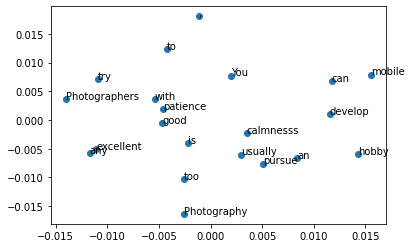

In [15]:
texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss"
        " You can try Photography with any good mobile too"]

# We prepare a list containing lists of tokens of each text
all_tokens=[]
for text in texts:
  tokens=[]
  raw=nltk.wordpunct_tokenize(text)
  for token in raw:
    tokens.append(token)
    all_tokens.append(tokens)

# Import and fit the model with data
import gensim
from gensim.models import Word2Vec
model=Word2Vec(all_tokens)

# Visualizing the word embedding
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# 8. Represent the document using Doc2Vec model
* Represent a text document in the form a vector

In [16]:
texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss"
        " You can try Photography with any good mobile too"]

# Importing the model
from gensim.models import Doc2Vec

# Preparing data in the format and fitting to the model
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
my_data = list(tagged_document(all_tokens))
model=Doc2Vec(my_data)

model.infer_vector(['photography','is','an',' excellent ','hobby ','to',' pursue '])

array([-7.9590746e-04,  4.9321895e-04, -4.0548127e-03, -1.2114483e-03,
       -1.2728145e-03,  3.5021685e-03, -3.3141307e-03,  4.3722522e-03,
        3.5762156e-03, -3.6750000e-03,  2.3858279e-03, -2.2476246e-03,
       -4.8091654e-03, -7.1960990e-04, -4.2196014e-03, -3.1528883e-03,
        1.1212403e-03,  2.5237573e-03, -2.4143283e-03, -1.8124084e-03,
        2.1121232e-03, -2.5454201e-03,  4.7964463e-03,  2.5096231e-03,
       -6.0374034e-04,  1.5681320e-04,  2.9133731e-03, -2.0692886e-03,
        2.6469943e-03, -1.8851331e-03, -4.3800822e-03,  2.9184676e-03,
       -1.9882047e-03,  3.5879021e-03, -6.9014385e-04,  4.6111802e-03,
        4.2926045e-03,  1.4506464e-03, -4.0247110e-03, -3.2765346e-03,
       -3.8970746e-03, -8.1057387e-04, -2.4775730e-03, -1.4665971e-03,
       -2.6866826e-05,  1.8502270e-04,  1.8537877e-04, -1.5160951e-03,
        3.6883268e-03,  5.8342983e-05, -3.7782954e-03,  3.0292913e-03,
        1.0123426e-03, -1.4146502e-03, -5.3478079e-04, -3.4402509e-03,
      

# 9. Extract the TF-IDF Matrix
* Extract the TF-IDF (Term Frequency -Inverse Document Frequency) Matrix for the given list of text documents

In [17]:
text_documents=['Painting is a hobby for many , passion for some',
                'My hobby is coin collection'
                'I do some Painting every now and then']

# Using sklearn's TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the vectorizer to our text documents
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text_documents)
print(matrix)

  (0, 13)	0.2511643891128359
  (0, 12)	0.35300278529739293
  (0, 8)	0.35300278529739293
  (0, 5)	0.7060055705947859
  (0, 6)	0.2511643891128359
  (0, 7)	0.2511643891128359
  (0, 11)	0.2511643891128359
  (1, 14)	0.31583360086881224
  (1, 0)	0.31583360086881224
  (1, 10)	0.31583360086881224
  (1, 4)	0.31583360086881224
  (1, 3)	0.31583360086881224
  (1, 2)	0.31583360086881224
  (1, 1)	0.31583360086881224
  (1, 9)	0.31583360086881224
  (1, 13)	0.22471820826199104
  (1, 6)	0.22471820826199104
  (1, 7)	0.22471820826199104
  (1, 11)	0.22471820826199104


# 10. Create bigrams using Gensim’s Phraser
Create bigrams from the given texts using Gensim library’s Phrases

In [18]:
documents = ["the mayor of new york was there", "new york mayor was present"]

# Import Phraser from gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

sentence_stream = [doc.split(" ") for doc in documents]

# Creating bigram phraser
bigram = Phrases(sentence_stream, min_count=1, threshold=2, delimiter=b' ')
bigram_phraser = Phraser(bigram)

for sent in sentence_stream:
    tokens_ = bigram_phraser[sent]
    print(tokens_)

['the', 'mayor', 'of', 'new york', 'was', 'there']
['new york', 'mayor', 'was', 'present']


# 11. Create bigrams, trigrams using ngrams
* Extract all bigrams, trigrams using *ngrams* of nltk library

In [19]:
Sentences="Machine learning is a neccessary field in today's world. Data science can do wonders . Natural Language Processing is how machines understand text "

# Creating bigrams and trigrams
from nltk import ngrams
bigram=list(ngrams(Sentences.lower().split(),2))
trigram=list(ngrams(Sentences.lower().split(),3))

print(" Bigrams are",bigram)
print(" Trigrams are", trigram)

 Bigrams are [('machine', 'learning'), ('learning', 'is'), ('is', 'a'), ('a', 'neccessary'), ('neccessary', 'field'), ('field', 'in'), ('in', "today's"), ("today's", 'world.'), ('world.', 'data'), ('data', 'science'), ('science', 'can'), ('can', 'do'), ('do', 'wonders'), ('wonders', '.'), ('.', 'natural'), ('natural', 'language'), ('language', 'processing'), ('processing', 'is'), ('is', 'how'), ('how', 'machines'), ('machines', 'understand'), ('understand', 'text')]
 Trigrams are [('machine', 'learning', 'is'), ('learning', 'is', 'a'), ('is', 'a', 'neccessary'), ('a', 'neccessary', 'field'), ('neccessary', 'field', 'in'), ('field', 'in', "today's"), ('in', "today's", 'world.'), ("today's", 'world.', 'data'), ('world.', 'data', 'science'), ('data', 'science', 'can'), ('science', 'can', 'do'), ('can', 'do', 'wonders'), ('do', 'wonders', '.'), ('wonders', '.', 'natural'), ('.', 'natural', 'language'), ('natural', 'language', 'processing'), ('language', 'processing', 'is'), ('processing', 

# 12. Merge two tokens as one
* Merge the first name and last name as single token in the given sentence

In [25]:
text="Robert Langdon is a famous character in various books and movies "

# Using retokenize() method of Doc object to merge two tokens
import spacy
nlp=spacy.load("en_core_web_sm")
doc = nlp(text)
with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[0:14])

for token in doc:
  print(token.text)

Robert Langdon is a famous character in various books and movies


# 13. Extract Noun phrases from a text
* Extract and print the noun phrases in given text document

In [24]:
text="There is a empty house on the Elm Street"

# Create a spacy doc of the text
import spacy
nlp=spacy.load("en_core_web_sm")
doc = nlp(text)

# Use `noun_chunks` attribute to extract the Noun phrases
chunks = list(doc.noun_chunks)
chunks

[a empty house, the Elm Street]

# 16. Identify named entities in the given text
* Identify and print all the named entities with their labels in the below text

In [23]:
text=" Walter works at Google. He lives in London."

# Load spacy modelimport spacy
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)
# Using the ents attribute of doc, identify labels
for entity in doc.ents:  
   print(entity.text,entity.label_)

Walter PERSON
Google ORG
London GPE


# 17. Identify all the names of Organizations present in the text with NER
* Identify and extract a list of all organizations/Companies mentioned in the given news article

In [26]:
text =" Google has released it's new model which has got attention of everyone. Amazon is planning to expand into Food delivery, thereby giving competition . Apple is coming up with new iphone model. Flipkart will have to catch up soon."

doc=nlp(text)
list_of_org=[]
for entity in doc.ents:
  if entity.label_=="ORG":
    list_of_org.append(entity.text)

print(list_of_org)

['Google', 'Amazon', 'Apple', 'Flipkart']


# 18. Replace all names of people in the text with ‘UNKNOWN’
* Identify and replace all the person names in the news article with UNKNOWN to keep privacy

In [27]:
news=" Walter was arrested yesterday at Brooklyn for murder. The suspicions and fingerprints pointed to Walter  and his friend  Pinkman . The arrest was made by inspector Hank"

doc=nlp(news)

# Identifying the entities of category 'PERSON'
entities = [entity.text  for entity in doc.ents  if entity.label_=='PERSON']
updated_text=[]

for token in doc:
  if token.text in entities:
    updated_text.append("UNKNOWN")
  else :
    updated_text.append(token.text)

" ".join(updated_text)

'  UNKNOWN was arrested yesterday at Brooklyn for murder . The suspicions and fingerprints pointed to UNKNOWN   and his friend   Pinkman . The arrest was made by inspector UNKNOWN'

# 19. Visualize the named entities using spaCy
* Display the named entities prsent in the given document along with their categories using spacy

In [28]:
text=" Walter was arrested yesterday at Brooklyn for murder. The suspicions and fingerprints pointed to Walter  and his friend  Pinkman . He is from Paris "

# Use spacy's displacy with the parameter style="ent"

from spacy import displacy
doc=nlp(text)
displacy.render(doc,style='ent',jupyter=True)

# 20. Implement dependency parsing
* Find the dependencies of all the words in the given text

In [29]:
text="Mark plays volleyball every evening."

# Using dep_ attribute od tokens in spaCy to access the dependency of the word in sentence.
doc=nlp(text)

for token in doc:
  print(token.text,token.dep_)

Mark nsubj
plays ROOT
volleyball dobj
every det
evening npadvmod
. punct


# 21. Find the ROOT word of any word in a sentence
* Find and print the root word / headword of any word in the given sentence

In [30]:
text="Mark plays volleyball. Sam is not into sports, he paints a lot"

# use the head attribute of tokens to find it's rootword
doc=nlp(text)
for token in doc:
  print(token.text,token.head)

Mark plays
plays plays
volleyball plays
. plays
Sam is
is paints
not is
into is
sports into
, paints
he paints
paints paints
a lot
lot paints


# 22. Visualize the dependency tree in spaCy
* Visualize the dependencies of various tokens of the given text using spaCy

In [31]:
text="Mark plays volleyball. Sam is not into sports, he paints a lot"

# Use spacy's displacy with the parameter style="dep"
doc=nlp(text)

from spacy import displacy
displacy.render(doc,style='dep',jupyter=True)

# 23. Summarize text using *gensim*
* Extract the summary of the given text based using gensim package based on the *TextRank* Algorithm

In [32]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, improve your sex life, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

# Importing the summarize function from gensim module
import gensim
from gensim.summarization.summarizer import summarize

# Pass the document along with desired word count to get the summary
my_summary=summarize(original_text,word_count=100)
print(my_summary)

As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%.
No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body.


# 24. Summarize text based on the LexRank algorithm
* Extract the summary of the given text based on the *TextRank* Algorithm

In [33]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, improve your sex life, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

!pip install sumy
import sumy
from sumy.summarizers.lex_rank import LexRankSummarizer

#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser=PlaintextParser.from_string(original_text,Tokenizer("english"))

summarizer=LexRankSummarizer()
my_summary=summarizer(parser.document,2)
print(my_summary)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.4 MB/s 
     |████████████████████████████████| 10.1 MB 31.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21711 sha256=5229d016d5d5d19a17b50ae3eae9bb8daa51507205e5889ab94d9e361a80642c
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=433f6726fdf26953d5260614839359a3931d6c272e01280fb0378b38086bf70e
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=4c09d3e316de21f5d244412604

# 25. Summarize text using Luhn algorithm
* Extract the summary of the given text based on the *Luhn* Algorithm

In [34]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

import sumy
from sumy.summarizers.luhn import LuhnSummarizer

#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser=PlaintextParser.from_string(original_text,Tokenizer("english"))

summarizer=LuhnSummarizer()
my_summary=summarizer(parser.document,2)
print(my_summary)

(<Sentence: Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.>, <Sentence: Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma.>)


# 26. Summarize text based on LSA algorithm
* Extract the summary of the given text based on the *LSA* Algorithm

In [35]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

import sumy
from sumy.summarizers.lsa import LsaSummarizer

#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser=PlaintextParser.from_string(original_text,Tokenizer("english"))

summarizer=LsaSummarizer()
my_summary=summarizer(parser.document,2)
print(my_summary)

(<Sentence: In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.>, <Sentence: People who exercise regularly tend to do so because it gives them an enormous sense of well-being.>)
